In [6]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 

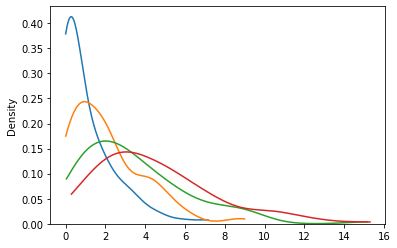

In [50]:

result=0
for i in range (1,20,5):
  sample = np.random.normal(loc=0, scale=1, size=100)
  result += sample**2
  sns.kdeplot(result, clip=(result.min(),result.max()))
  

In [5]:
sample=np.random.normal(1,10,40)

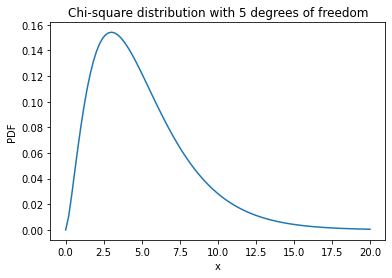

In [50]:
# Generate a chi-square distribution with 5 degrees of freedom

chisq = stats.chi2(df=5)

# Create an array of x values from 0 to 20
x = np.linspace(0, 20, 100)

# Calculate the PDF at each x value
pdf = chisq.pdf(x)

# Create a plot of the PDF
plt.plot(x, pdf)
plt.title("Chi-square distribution with 5 degrees of freedom")
plt.xlabel("x")
plt.ylabel("PDF")
plt.show()


### impact on distribution by changing on degree of freedom 

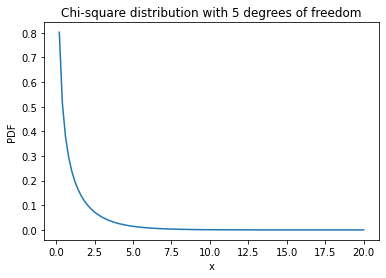

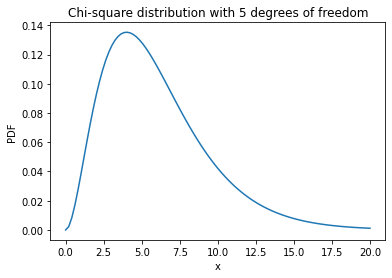

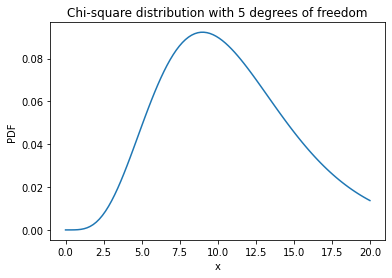

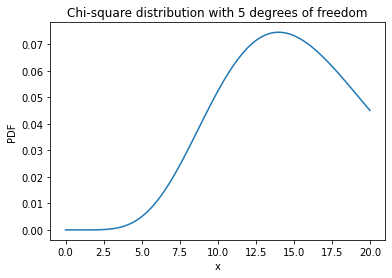

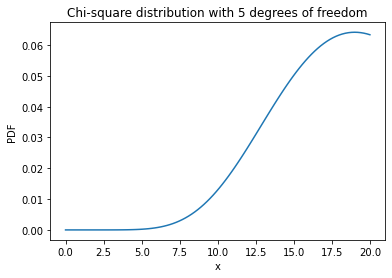

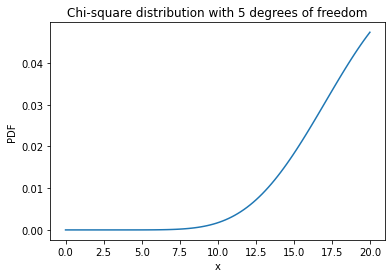

In [51]:


for i in range (1,30,5):
    chisq = stats.chi2(df=i)
    x = np.linspace(0, 20, 100)
    pdf = chisq.pdf(x)
    plt.plot(x, pdf)
    plt.title("Chi-square distribution with 5 degrees of freedom")
    plt.xlabel("x")
    plt.ylabel("PDF")
    plt.show()




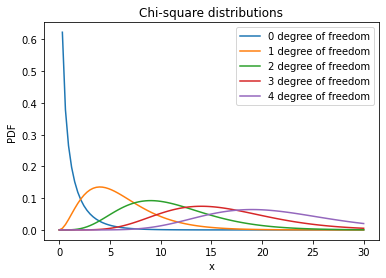

In [57]:
pdfs = []  

# Loop over degrees of freedom from 1 to 25 with a step size of 5
for i in range(1, 26, 5):
    
    chisq = stats.chi2(df=i)
    x = np.linspace(0, 30, 100)
    pdf = chisq.pdf(x)
    pdfs.append(pdf)

# Plot all the PDFs in one graph
for i in range (0,5):
    plt.plot(x, pdfs[i], label='{} degree of freedom'.format(i))
plt.title("Chi-square distributions")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()  
plt.show()

In [15]:
population = np.random.exponential(scale=1, size=10000)

In [16]:
import seaborn as sns 

<AxesSubplot: ylabel='Density'>

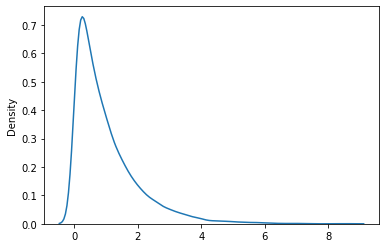

In [17]:
sns.kdeplot(population)

In [18]:
sample_size = 100
num_samples = 1000

# Draw random samples from the population
samples = np.random.choice(population, size=(num_samples, sample_size))

In [26]:
sample_mean=samples.mean(axis=1)

In [31]:
population.mean()

1.0021872036500818

In [41]:
z_value=stats.norm.ppf(0.025)

In [48]:
stats.t.ppf(0.025,10)

-2.2281388519649385

In [37]:
error_of_margin =population.std()/len(samples)*1.96

In [40]:
upper_bound=sample_mean.mean() + error_of_margin
lower_bound=sample_mean.mean()- error_of_margin

NameError: name 'lower_bound' is not defined

In [63]:
np.random.seed(0)
pop=np.random.normal(10,50,10000)

In [84]:
a=np.array([np.random.choice(pop,25) for i in range (4) ])

In [86]:
a.mean(axis=1)

array([17.96356357,  0.24231659, -2.75887899,  8.23555394])

In [96]:
l=[]
for i in range(4):
    sample_mean = np.mean(samples[i])
    pop_mean = np.mean(pop)
    pop_std = np.std(pop, ddof=1)
    n = len(samples[i])
    z = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
    l.append(z)
    print("Sample", i+1, "mean:", sample_mean)
    print("Z-value:", z)

Sample 1 mean: 0.9891783621035628
Z-value: -1.6381301940056925
Sample 2 mean: 0.9789841896288994
Z-value: -1.6401946150387319
Sample 3 mean: 1.0852807094552157
Z-value: -1.6186685155133647
Sample 4 mean: 1.0125007165070528
Z-value: -1.6334071859253176


<AxesSubplot: ylabel='Density'>

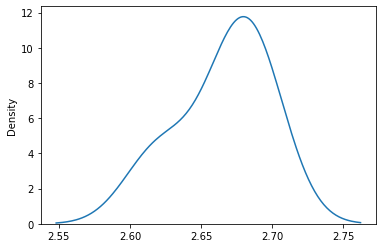

In [110]:
sns.kdeplot(np.array(l)**2)

In [2]:
import numpy as np
from scipy.stats import chisquare

# observed data
observed = np.array([17, 24, 18, 22, 19, 20])

# expected data
expected = np.array([20, 20, 20, 20, 20, 20])

# perform chi-square test
test_statistic, p_value = chisquare(observed, f_exp=expected)

# print results
print("Chi-square test statistic:", test_statistic)
print("p-value:", p_value)

Chi-square test statistic: 1.7
p-value: 0.8888997594927638


In [20]:
alpha=0.025
df=5
stats.chi2.ppf(alpha,df)

0.8312116134866625

Suppose a marketing team at a retail company wants to understand the distribution of visits to
their website by day of the week. They have a hypothesis that visits are uniformly distributed
across all days of the week, meaning they expect an equal number of visits on each day. They
collected data on website visits for four weeks and want to test if the observed distribution
matches the expected uniform distribution.
Observed frequencies (number of website visits per day of the week for four weeks):

- Monday: 420
- Tuesday: 380
- Wednesday: 410
- Thursday: 400
- Friday: 410
- Saturday: 430
- Sunday: 390

In [47]:
days=np.array([420,380,410,400,410,430,390])

chi_statistics=((days-(days.sum()/len(days)))**2).sum()/(days.sum()/len(days))

In [45]:
excepted=np.repeat(days.sum()/len(days),7)

In [52]:
p_value=1-stats.chi2.cdf(chi_statistics,len(days)-1)
print(p_value)

0.6272491491065606


In [46]:
stats.chisquare(days,excepted)

Power_divergenceResult(statistic=4.366197183098591, pvalue=0.6272491491065606)

In [83]:
observed = [32, 178, 290, 236, 64]


In [84]:
excepected=np.array([stats.binom.pmf(k=i,n=4,p=0.5) for i in range(5)])*sum(observed)

In [90]:
stats.chisquare(observed,excepected)

Power_divergenceResult(statistic=19.63333333333331, pvalue=0.0005898876209430525)

In [87]:
1-stats.chi2.cdf(((observed-excepected)**2/excepected).sum(),len(observed)-1)

0.0005898876209430304

### python case study 


In [52]:
df=pd.read_csv('train.csv')

In [59]:
Class_count=df.Pclass.value_counts()

In [62]:
#null hypothesis is it follow the uniform distribution 
#alternate hypothesis it isn't follow the unifom distribution 

#excepected 

excepected=np.repeat(Class_count.sum()/3,len(Class_count))

In [77]:
chi_statistics,p_value=stats.chisquare(Class_count,excepected)

In [ ]:
# the result is less than the significent value so wecan reject the null hypothesis 

In [75]:
1-stats.chi2.cdf(((Class_count-excepected)**2/excepected).sum(),df=2)

0.0

In [78]:
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. The distribution of passengers among the classes is not uniform.")
else:
    print("\nWe fail to reject the null hypothesis. The distribution of passengers among the classes is uniform.")



We reject the null hypothesis. The distribution of passengers among the classes is not uniform.


# Chi-square test of independence

In [79]:
observed = np.array([[1, 2, 0], [0, 1, 2], [1, 0, 0]])

In [80]:
observed

array([[1, 2, 0],
       [0, 1, 2],
       [1, 0, 0]])

In [88]:
row_sum=observed.sum(axis=1)
column_sum=observed.sum(axis=0)
total=observed.sum()

In [97]:
# creating expected value

expected=(np.outer(row_sum,column_sum))/total

In [100]:
chi_statistics=((observed-expected)**2/expected).sum()

In [104]:
degree_of_freedom=(observed.shape[0]-1)*(observed.shape[1]-1)

In [108]:
p_value_by_procedure=1-stats.chi2.cdf(chi_statistics,degree_of_freedom)

In [110]:
chi_statistics,p_value,df,excepted_value=stats.chi2_contingency(observed)

In [114]:
if p_value<0.05:
    print('Reject the null hypohtesis means there is significent relationship between the variables')
else:
    print('fail to reject null hypothesis or there is no significent relationship beteween the variable ')

fail to reject null hypothesis or there is no significent relationship beteween the variable 


In [118]:
df=pd.read_csv('train.csv')

In [123]:
obs=pd.crosstab(df['Survived'],df['Pclass'])

In [125]:
ch_statisticd,p_value,dof,excepted_value=stats.chi2_contingency(obs)

In [128]:
if p_value<0.05:
    print('we Reject the null hypohtesis means there is significent relationship between the variables')
else:
    print('we fail to reject null hypothesis or there is no significent relationship beteween the variable ')

we Reject the null hypohtesis means there is significent relationship between the variables
